### 這個工作的目標是在不斷變化的台股市場中尋找穩定獲利的策略。策略名稱取自《易經》，以表徵市場的盤勢發展，並協助投資者趨吉避凶。



In [2]:
import datetime

from dateutil.relativedelta import relativedelta

from stock_tw.變易 import util, dataset

dataset.datatime_range

{'max_price': Timestamp('2023-11-09 00:00:00'),
 'max_pera': Timestamp('2023-12-31 00:00:00'),
 'max_revenue': Timestamp('2023-11-10 00:00:00'),
 'max_fin_stmt': Timestamp('2023-11-14 00:00:00'),
 'min_price': Timestamp('2023-05-10 00:00:00'),
 'min_pera': Timestamp('2017-12-31 00:00:00'),
 'min_revenue': Timestamp('2017-06-10 00:00:00'),
 'min_fin_stmt': Timestamp('2022-05-15 00:00:00')}

# 不易：元亨


In [2]:
# df = dataset.元亨(
#     daily_ts=datetime.datetime(2023, 11, 8),  # ts of the daily price data
#     ifrs_ts=datetime.datetime(2023, 8, 14),  # ts of the financial statement data 
# )
df = dataset.analyze_base(ifrs_ts=datetime.datetime(2023, 8, 14))
df.round(2)

,name,group,收盤價,漲跌幅(%),成交股數(M),成交筆數(M),成交金額(M),本益比,股價淨值比,殖利率(%),股利年度,股利連續N年,普通股股本,資產總計,權益總額,權益比(%)
code,,,,,,,,,,,,,,,,
1101,台泥,水泥工業,32.9,0.00,22814287.0,10538.0,799975778.0,26.97,1.13,1.52,111.0,5.0,71561817.0,456341649.0,234719451.0,51.44
1102,亞泥,水泥工業,40.4,0.12,4513466.0,2535.0,187907029.0,12.06,0.89,5.69,111.0,5.0,35465629.0,335089649.0,184122969.0,54.95
1103,嘉泥,水泥工業,18.4,0.54,842448.0,484.0,17790952.0,37.55,0.52,2.72,111.0,5.0,7747805.0,37755420.0,23417199.0,62.02
1104,環泥,水泥工業,26.6,0.38,1808967.0,1025.0,51799291.0,9.30,0.80,6.77,111.0,5.0,6536092.0,29120141.0,22306599.0,76.60
1108,幸福,水泥工業,14.3,2.10,952269.0,424.0,14794961.0,8.41,1.20,5.59,111.0,4.0,4047380.0,9725755.0,4812635.0,49.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,英瑞-KY,電機機械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1566,捷邦,電機機械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1507,永大,電機機械,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


# 不易：利貞

In [10]:
df = dataset.analyze_profit(ifrs_ts=datetime.datetime(2023, 8, 14))
df.iloc[:, 6:28]

,E(0),E(1),E(2),E(3),外(0),外(1),外(2),外(3),GPM(0),NIM(0),...,DBR(0),GPM,NIM,ROA,ROE,DBR,EPS(0)+,GPM+,NIM+,ROA+
code,,,,,,,,,,,,,,,,,,,,,
1101,0.45,0.20,0.36,0.22,57.375585,130.744279,56.508851,90.064214,21.631147,15.204013,...,48.564973,54.211594,31.803471,2.061676,4.042603,196.529391,0.25,12.241020,11.379679,0.703990
1102,1.26,0.81,0.19,1.33,64.973437,62.319290,-5.817498,68.769489,15.860550,20.802349,...,45.052624,46.472834,58.429470,3.717221,6.708520,177.703973,0.45,5.554960,6.397015,0.483295
1103,0.00,0.03,0.05,0.41,44805.000000,315.701426,319.477135,144.231636,10.812875,0.011030,...,37.976590,39.931977,60.028557,0.961276,1.578207,155.049552,-0.03,1.189018,-3.962400,-0.069088
1104,0.62,0.42,0.92,0.87,64.927041,43.410474,71.180472,72.546077,19.987245,21.985797,...,23.398039,78.932077,106.217916,7.200069,9.342873,91.190240,0.20,1.215827,6.712061,0.452529
1108,0.37,0.31,0.69,0.33,-0.990504,8.527363,-2.086068,10.227640,20.637648,11.469562,...,50.516592,93.505399,58.600812,7.172999,14.372873,201.248105,0.06,2.211964,-0.172981,0.247310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [24]:
df.iloc[:,28:-8].head(5).round(2)

,GPM(%),NIM(%),ROA(%),ROE(%),DBR(%),EPS(0)+,GPM(%)+,NIM(%)+,ROA(%)+,ROE(%)+,DBR(%)+,股本+,資產+
code,,,,,,,,,,,,,
1101,33.02,12.86,0.93,1.82,199.55,-0.16,-5.56,-3.69,-0.35,-0.67,-0.30,0.0,839407.0
1102,47.27,56.93,3.85,6.98,178.09,0.62,2.72,11.77,0.63,1.19,2.88,0.0,9599791.0
1103,28.31,-21.43,-0.18,-0.30,156.42,-0.02,-2.16,-1.55,-0.03,-0.05,-1.18,0.0,936998.0
1104,76.83,103.65,7.03,9.15,92.74,-0.50,-2.82,-21.10,-1.61,-2.10,-1.06,0.0,322963.0
1108,95.16,58.79,6.95,13.82,199.37,-0.38,-15.33,-11.34,-1.55,-2.94,2.20,0.0,35436.0


# 不易：躍龍在淵

In [11]:
dataset.append_stock_info(dataset.anal_revenue.round(2))

,name,group,updated_ts,當月營收,當月累計營收,去年累計營收,R(1),R(2),R(y),YoY,MoM,IsM3
code,,,,,,,,,,,,
1108,幸福,水泥工業,2023-11-07 07:50:05,451146.0,4141653.0,3347381.0,404171.0,430420.0,401202.0,12.45,11.62,False
1201,味全,食品工業,2023-11-09 09:50:02,1894929.0,17885259.0,16933521.0,1944806.0,2024542.0,1719108.0,10.23,-2.56,False
1213,大飲,食品工業,2023-11-08 11:20:02,403.0,116889.0,328870.0,636.0,-998.0,30818.0,-98.69,-36.64,False
1220,台榮,食品工業,2023-11-08 11:20:02,289053.0,2643847.0,2888952.0,295646.0,296778.0,334007.0,-13.46,-2.23,False
1231,聯華食,食品工業,2023-11-09 09:50:02,874442.0,8863900.0,8629827.0,796194.0,1042128.0,866871.0,0.87,9.83,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9946,三發地產,建材營造業,2023-11-09 08:50:02,111223.0,713435.0,2113593.0,57454.0,85820.0,94749.0,17.39,93.59,False
9949,琉園,文化創意業,2023-11-09 06:10:02,18548.0,137149.0,163052.0,10138.0,12007.0,28234.0,-34.31,82.96,False
9955,佳龍,其他業,2023-11-08 11:20:02,99903.0,964450.0,986620.0,89272.0,82315.0,80630.0,23.90,11.91,True


# 不易：風升

In [15]:
dataset.his_profits.round(2)

基本每股盈餘合計  營業外收入及支出合計   營業毛利（毛損）  營業毛利（毛損）淨額   本期淨利（淨損）  \
ts         code                                                           
2022-05-15 1101      0.20    964488.0  1996361.0   1996361.0   856506.0   
           1102      0.76    969748.0  2975892.0   2975892.0  2716844.0   
           1103     -0.12     49021.0    15322.0     15322.0   -77250.0   
           1104      0.82    399944.0   292217.0    292217.0   538395.0   
           1108      0.14    -15285.0   141408.0    141408.0    54885.0   
...                   ...         ...        ...         ...        ...   
2023-11-14 9931      0.34     20790.0    39175.0     39175.0    40817.0   
           9933      0.56      4514.0  1453755.0   1453755.0   680409.0   
           9935      0.49     29379.0   275726.0    275726.0    84467.0   
           9943      2.37     99004.0   361439.0    361439.0   201707.0   
           9951      1.52     39611.0   330843.0    330843.0   114032.0   

                     營業收入合計  繼續營業單位稅前淨利（淨損）  繼續營業單位本期淨利（淨損）  母公司業主（淨利／損）  \
ts         code                                                            
2022-05-15 1101  22973461.0       1172111.0        856506.0    1204144.0   
           1102  19681118.0       3434011.0       2716844.0    2533389.0   
           1103    512577.0        -51257.0        -77250.0     -80636.0   
           1104   1532253.0        571640.0        538395.0     534814.0   
           1108    880911.0         70317.0         54885.0      54885.0   
...                     ...             ...             ...          ...   
2023-11-14 9931    272572.0         45771.0         40817.0      40513.0   
           9933  27965516.0       1034658.0        680409.0     444742.0   
           9935   1324182.0        108915.0         84467.0      84467.0   
           9943    684420.0        235299.0        201707.0     200834.0   
           9951   1319434.0        146919.0        114032.0     114032.0   

                 繼續營業單位淨利（淨損）  ...         資產總計         權益總額   ROA   ROE  \
ts         code                ...                                         
2022-05-15 1101          0.20  ...  452838271.0  235757755.0  0.19  0.36   
           1102          0.76  ...  321741487.0  189339654.0  0.84  1.43   
           1103         -0.12  ...   40820534.0   26503290.0 -0.19 -0.29   
           1104          0.82  ...   26623702.0   20752652.0  2.02  2.59   
           1108          0.14  ...    8100128.0    4455774.0  0.68  1.23   
...                       ...  ...          ...          ...   ...   ...   
2023-11-14 9931           NaN  ...    5952208.0    2578759.0  0.69  1.58   
           9933          0.55  ...  117396005.0   22168075.0  0.58  3.07   
           9935           NaN  ...    6750175.0    2307754.0  1.25  3.66   
           9943          2.37  ...    5743497.0    3945298.0  3.51  5.11   
           9951          1.52  ...    5893502.0    3542512.0  1.93  3.22   

                   DBR    GPM    NIM     (C)營收合計    (C)平均月營收  (C)合計月數  
ts         code                                                        
2022-05-15 1101  47.94   8.69   3.73  22945614.0  7648538.00        3  
           1102  41.15  15.12  13.80  19681816.0  6560605.33        3  
           1103  35.07   2.99 -15.07    512577.0   170859.00        3  
           1104  22.05  19.07  35.14   1532253.0   510751.00        3  
           1108  44.99  16.05   6.23    880911.0   293637.00        3  
...                ...    ...    ...         ...         ...      ...  
2023-11-14 9931  56.68  14.37  14.97    272572.0    90857.33        3  
           9933  81.12   5.20   2.43  27966415.0  9322138.33        3  
           9935  65.81  20.82   6.38   1324078.0   441359.33        3  
           9943  31.31  52.81  29.47    684420.0   228140.00        3  
           9951  39.89  25.07   8.64   1319435.0   439811.67        3  

[11072 rows x 22 columns]

<Axes: xlabel='ts'>

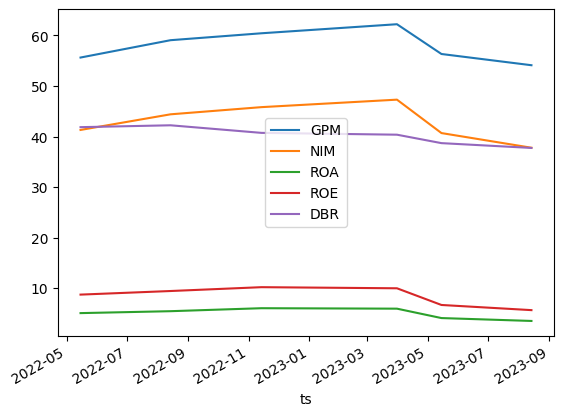

In [16]:
# 台積電獲利能力

df = dataset.his_profits.round(2)
df = dataset.reverse_df_index(df)
df = df.loc['2330'][['GPM', 'NIM', 'ROA' ,'ROE', 'DBR']]
df.plot()

<Axes: >

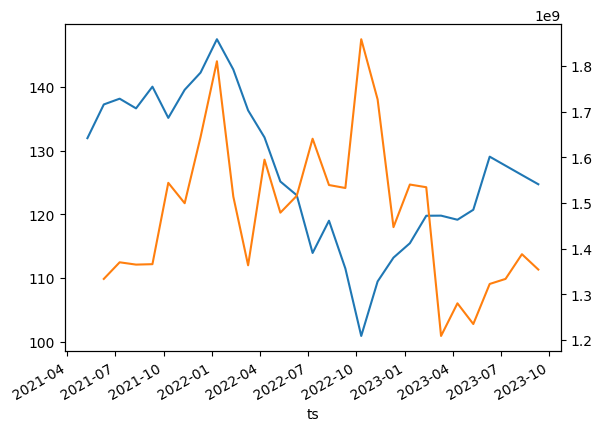

In [21]:
# TW50 股價-營收 趨勢觀察

# connection = util.get_db_proxy().connection
# dataset.refresh_revenues(connection, datetime.datetime(2021, 5, 1))
# dataset.refresh_prices(connection, datetime.datetime(2021, 5, 1))
# connection.close()

TW50 = [ '台積電', '鴻海', '聯發科', '台達電', '聯電', '中華電', '中信金', '兆豐金', '玉山金', '南亞', '日月光投控', '中鋼', '台塑', '廣達', 
        '中租-KY', '第一金', '合庫金', '聯詠', '和泰車', '台泥', '台化', '大立光', '華南金', '亞德客-KY', '華新', '台塑化', '彰銀', 
        '矽力*-KY', '陽明', '萬海', '豐泰', '南亞科'] + ["元大金", "台灣大", "國泰金", "富邦金", "統一", "統一超", "遠傳", "遠東新", "開發金"]

_revenues = dataset.revenues.reset_index()
_revenues = _revenues[ (_revenues['ts'] > datetime.datetime(2021, 5, 10)) & (_revenues['ts'] < datetime.datetime(2023, 10, 1)) ]
_revenues = dataset.append_stock_info(_revenues).set_index(['name'])
_revenues = _revenues.loc[TW50][['當月營收', 'ts']]
# _revenues.groupby(['ts']).count()
_revenues = _revenues.groupby(['ts']).sum()

_prices = dataset.prices.reset_index()
_prices = _prices[ (_prices['ts'] > datetime.datetime(2021, 5, 10)) & (_prices['ts'] < datetime.datetime(2023, 10, 1)) ]
_prices = dataset.append_stock_info(_prices).set_index(['name'])
_prices = _prices.loc['元大台灣50'][['收盤價', 'ts']]
_prices['ts'] = _prices['ts'].apply(lambda x: datetime.datetime(x.year, x.month, 10))
_prices = _prices.groupby(['ts']).mean()

_prices['收盤價'].plot()
_revenues['當月營收'].plot(secondary_y=True)

# 不易：飛龍在天

In [8]:
df = dataset.analyze_profit(ifrs_ts=datetime.datetime(2023, 8, 14))
df.iloc[:, 19:-6].round(2)

,GPM,NIM,ROA,ROE,DBR,EPS(0)+,GPM+,NIM+,ROA+,ROE+,DBR+,股本+,資產+,權益+,本期淨利（淨損）,YoY,QoQ,IsQ3
code,,,,,,,,,,,,,,,,,,
1101,54.21,31.80,2.06,4.04,196.53,0.25,12.24,11.38,0.70,1.37,0.57,0.0,-5306719.0,-5361583.0,4206683.0,-547.18,318.31,False
1102,46.47,58.43,3.72,6.71,177.70,0.45,5.55,6.40,0.48,0.85,-1.01,6353.0,1246731.0,4065084.0,4396883.0,-7.00,58.90,True
1103,39.93,60.03,0.96,1.58,155.05,-0.03,1.19,-3.96,-0.07,-0.11,-0.43,0.0,406108.0,411041.0,80.0,-100.02,-99.69,False
1104,78.93,106.22,7.20,9.34,91.19,0.20,1.22,6.71,0.45,0.62,1.86,0.0,985283.0,231059.0,421949.0,24.25,50.51,False
1108,93.51,58.60,7.17,14.37,201.25,0.06,2.21,-0.17,0.25,0.45,-0.91,0.0,28448.0,102424.0,151640.0,29.76,19.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1566,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1507,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# 不易：亢龍有悔